In [6]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'axes.grid':True,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'ytick.right': True,
                 'xtick.top':True,                 
                 'ytick.major.size': 10,
                 'xtick.major.size': 10,
                 'legend.fancybox': True,
                 'legend.markerscale': 0.8,
                 'legend.handlelength': 5.0,
                 'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),

                 
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 


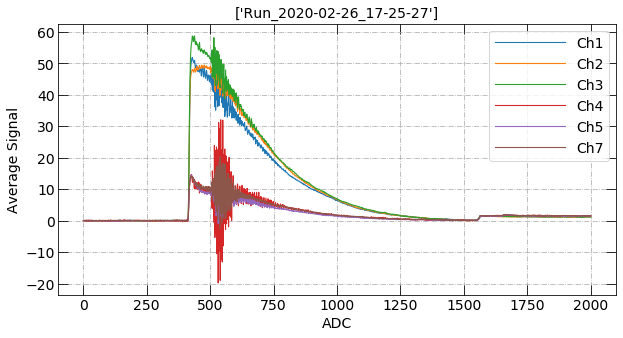

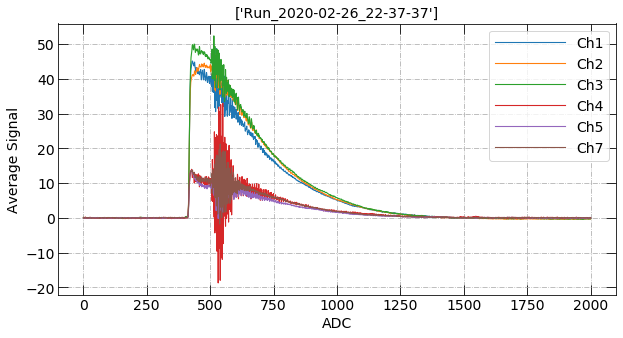

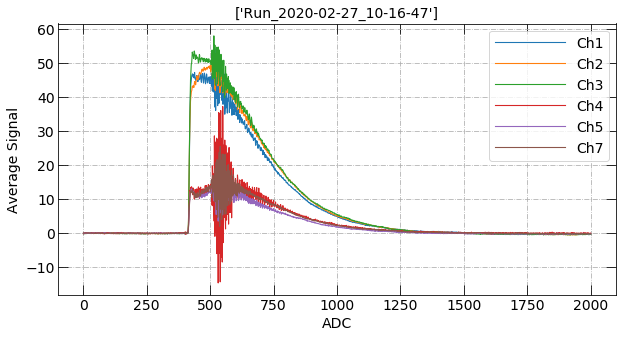

In [54]:
dirname = '/home/furkan/data/test_pods/'
Run = []

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            Run = []
            Run: Run.append('Run_' +filename.split('.pkl')[0])
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1.1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(Run)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plt.ticklabel_format(style='plain')
            #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
            plt.legend() 
            #plt.yscale('log')
            #plt.xlim(200, 600)
            #plt.ylim(0.0001, 0.1)
            plt.show()                 

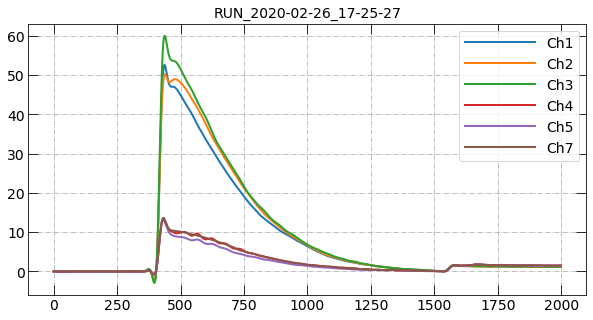

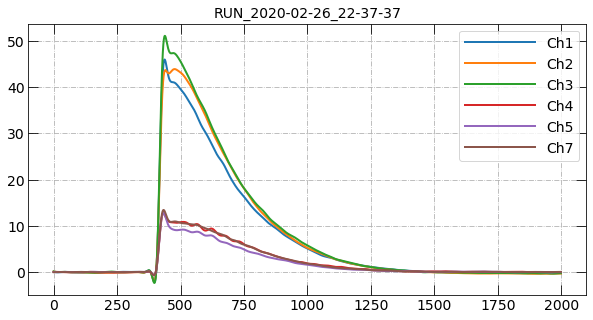

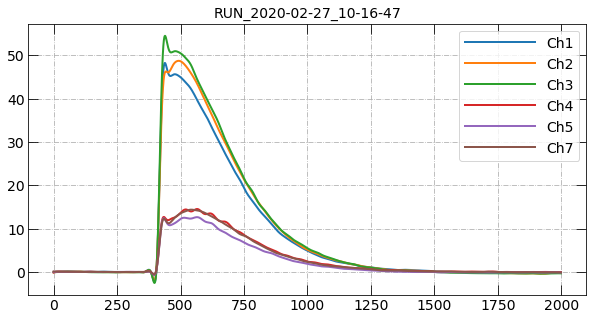

In [55]:
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)   

                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN_'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            plt.legend() 
            plt.show()    

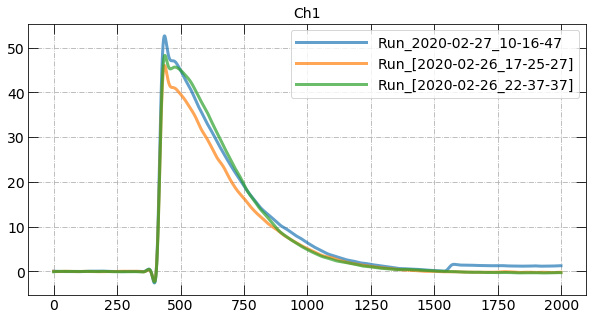

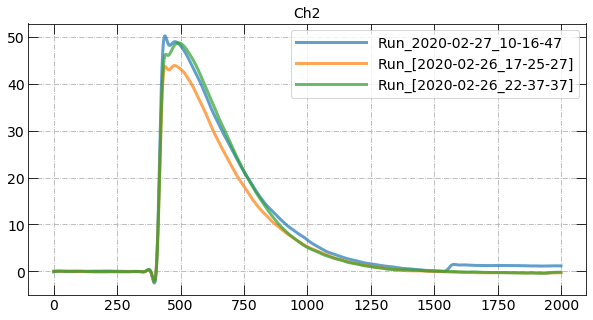

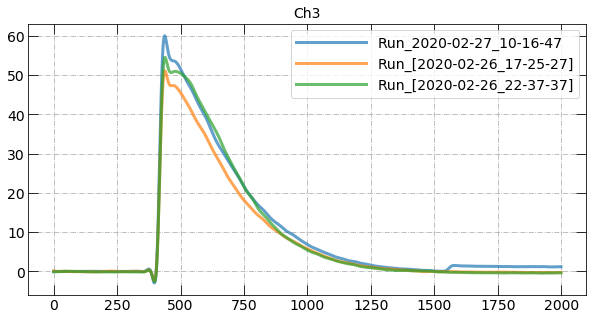

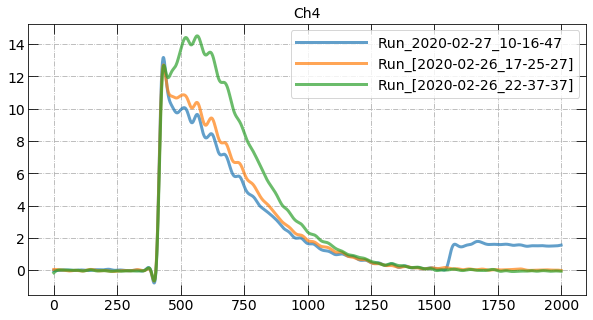

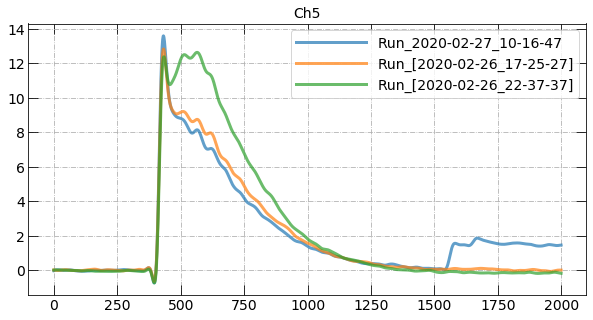

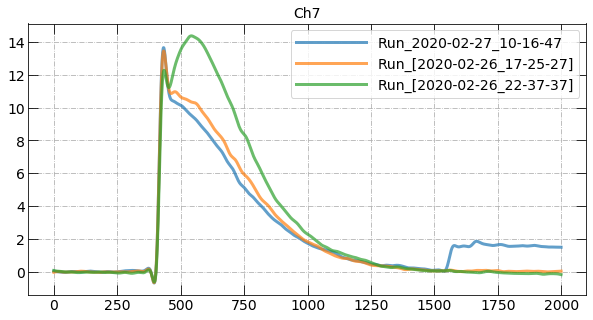

In [56]:
#channels = ['Ch7']
channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '.pkl' in filename:
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)

        plt.grid(True)
        plt.title(ch)
        plt.plot(y,linewidth=3,alpha=0.7)
    #plt.legend(str(os.path.splitext(filename)[0]))
    plt.legend(Run,handlelength=5,) 

    plt.show()


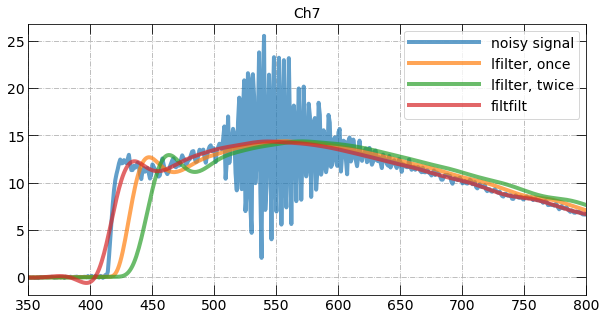

In [57]:
channels = ['Ch7']
#channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '10-16-47' in filename:
            continue
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
                
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)
    plt.grid(True)
    plt.title(ch)    
    plt.plot(t, mydata[ch],t,z,t,z2,t,y, linewidth=4,alpha=0.7)
    #plt.legend(str(os.path.splitext(filename)[0]))
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
    plt.xlim(350, 800)

    plt.show()

In [51]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


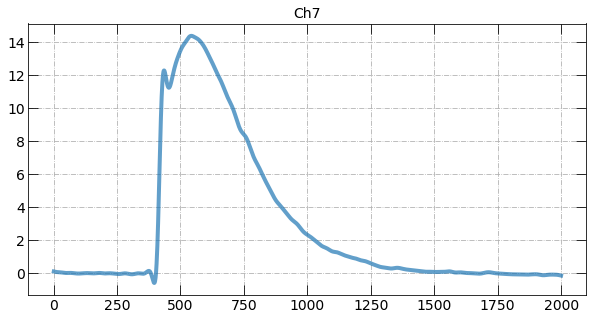

In [58]:
channels = ['Ch7']
#channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '10-16-47' in filename:
            continue
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
                
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)
    plt.grid(True)
    plt.title(ch)    
    plt.plot(t, y, linewidth=4,alpha=0.7)
    #plt.legend(str(os.path.splitext(filename)[0]))
    #plt.yscale('log')

    plt.show()

In [59]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([3675, 0.00433,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

[3.675e+03 4.330e-03]


In [60]:
def func(x, a, b, c, d, e, f, g, z):
    #return a + b*np.exp(-x/c)
    return (z + a*np.exp(-(x-a)/b)+c*np.exp(-(x-a)/d)+e*np.exp(-(x-a)/f))
    #return (a*np.power(x-b/c)*(d*np.exp(-(x-b)/e)+f*np.exp(-(x-

In [62]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func,  y, t, p0=(0.1 ,0.1 ,10000 ,100 ,0.1 ,100 ,1,10000 ))
popt
#[335.32882701, 822.15743957, 246.29549506]

/home/furkan/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 2.64413993e+00, -2.62780028e+00, -3.41216010e+03, -6.55773301e+01,
       -1.01567590e+04,  9.48015448e+06,  1.00000000e+00,  1.45646176e+04])

/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/furkan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/furkan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


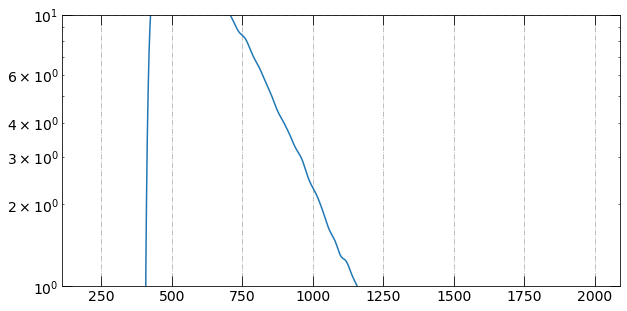

In [64]:
plt.plot(t[200:2000:1],y[200:2000:1], t[200:2000:1], func(t[200:2000:1], *popt), 'r-', label='fit')
plt.yscale('log')